**PROBLEM STATEMENT:**

Olist, a Brazilian ecommerce marketplace, is experiencing concerns from sellers regarding delayed deliveries and decreased conversion rates. The company aims to identify friction points in the purchase-to-delivery funnel and conduct experiments to improve seller performance and customer experience. The objective is to diagnose these issues, propose data-backed improvements and offer useful insights through dashboards and experiments. 

**TASK 2: Find Bottlenecks in the Delivery Pipeline (From Order to Delivery) and Identify Top Performing Sellers and Product Categories**

In [2]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

In [3]:
customers_copy2=pd.read_csv('delivery_bottleneck.csv')

In [4]:
customers_copy2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,14940,ibitinga,SP


In [5]:
# Ensure all datetime columns are in proper format
date_cols = [
    'order_delivered_customer_date',
    'order_purchase_timestamp',
    'order_estimated_delivery_date',
    'order_delivered_carrier_date',
    'order_approved_at'
]

for col in date_cols:
    customers_copy2[col] = pd.to_datetime(customers_copy2[col]) 

In [6]:
# Delivery duration (purchase to customer delivery)
customers_copy2['delivery_duration'] = (customers_copy2['order_delivered_customer_date'] - customers_copy2['order_purchase_timestamp']).dt.days

# Delayed delivery: Delivered after estimated date
customers_copy2['delayed_delivery'] = customers_copy2['order_delivered_customer_date'] > customers_copy2['order_estimated_delivery_date']

# Approval to shipping lag
customers_copy2['approval_to_shipping'] = (customers_copy2['order_delivered_carrier_date'] - customers_copy2['order_approved_at']).dt.days

In [7]:
# Consider score <= 2 as a bad experience (proxy for returns/issues)
customers_copy2['is_negative_review'] = customers_copy2['review_score'] <= 2

return_rate = customers_copy2.groupby('seller_id')['is_negative_review'].mean().reset_index(name='return_rate')


In [8]:
customers_copy2.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state,delivery_duration,delayed_delivery,approval_to_shipping,is_negative_review
29846,628fc0c76ede71d2eb3890f876ec85b1,6843a7c5d293e73ab7f65351bdd0c7a2,2855,sao paulo,SP,28a1f9cca638114ce8fc6ddfce2b7d52,delivered,2017-08-25 08:10:43,2017-08-25 08:24:18,2017-08-25 20:33:30,...,25.0,20.0,housewares,11075,santos,SP,3,False,0,False
60794,348dab3f7710f2be30559eb101ff7696,677f15bcada4a99f87e743927803a3a4,4332,sao paulo,SP,e05ad3bb40dd7a1f005c828e86493bcc,delivered,2018-05-24 13:13:40,2018-05-25 02:55:02,2018-05-25 13:44:00,...,4.0,11.0,telephony,3569,sao paulo,SP,4,False,0,False
43071,2fc5d6605fdea45a8a6c16ffa8e9b28a,8d552aa7be95696b63fcfe8168cb5bae,28895,rio das ostras,RJ,21a4664de3039c3f5b8bc3701c87a1fe,delivered,2018-08-10 05:34:56,2018-08-11 13:30:18,2018-08-13 15:11:00,...,25.0,15.0,baby,3426,sao paulo,SP,7,False,2,False
79774,3c6612419abd34435aa81f8a6a2214b5,1f3c0c324fc4c5249da814054b2aaf10,28630,nova friburgo,RJ,6eb550fffe44d869e8985452540345ff,delivered,2017-05-26 15:40:36,2017-05-26 15:50:19,2017-05-26 15:59:13,...,37.0,22.0,small_appliances,11704,praia grande,SP,6,False,0,False
4721,f3fb90a75a693cc508aeee93a9cd627a,d91ddce4cf48379d62b74ff3c55f361d,14030,ribeirao preto,SP,4527fe780d1facd3191d875fd794b233,delivered,2017-06-07 17:52:49,2017-06-07 18:05:24,2017-06-08 14:33:13,...,12.0,30.0,pet_shop,13324,salto,SP,4,False,0,False
89882,932289aae7b7195bc53d4c640ea071f4,4b758691b67ec259ad016bfe2525f23d,19400,presidente venceslau,SP,df13cbaf3230c62a4b582317936e8a39,delivered,2018-07-08 11:25:34,2018-07-08 11:45:37,2018-07-10 14:57:00,...,16.0,16.0,sports_leisure,7023,guarulhos,SP,5,False,2,True
64839,94d177a18ba9c367b98639650d29ba6a,1027050edba8a0c71e1d0d3fcb2ca809,41925,salvador,BA,a173a87bc70963a0ab33b92dd6f193dd,delivered,2017-07-12 13:27:14,2017-07-12 14:15:10,2017-07-13 14:17:35,...,20.0,40.0,sports_leisure,4265,sao paulo,SP,12,False,1,False
11121,28aa85d26d033ed4ae3e8c1f18c0acf3,1d6c3bbcd0acc59e8965459b0b351a53,87053,maringa,PR,c86abff82c66f9db0bbd012aba219921,delivered,2017-03-13 10:14:48,2017-03-13 10:14:48,2017-03-16 08:33:01,...,3.0,19.0,furniture_decor,14940,ibitinga,SP,11,False,2,False
43838,2c14a849a684e7f8e9b652ac1365015d,2cb5852ab1f88eb85aa1b593be41d98d,71540,brasilia,DF,cf08d69c4cea9709409621927e2e41fc,delivered,2017-12-11 11:53:45,2017-12-13 02:38:32,2017-12-14 22:27:05,...,5.0,15.0,health_beauty,13405,piracicaba,SP,24,False,1,False
76023,890a87ab82ebd8875ee62996b9c6f067,1a8ecc893934298c06d6a0c425edce64,78255,jauru,MT,c477a36e7fcc7a915483289ed00f6ee4,delivered,2017-09-05 15:30:01,2017-09-06 03:04:15,2017-09-06 22:19:03,...,35.0,45.0,furniture_decor,3204,sao paulo,SP,9,False,0,False


In [9]:
customers_copy2[customers_copy2['delivery_duration'] < 0][['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_duration']]

,order_id,order_purchase_timestamp,order_delivered_customer_date,delivery_duration


Now we have all the necessary columns required to address the bottlenecks in our delivery pipeline. So, the next task is to convert this dataframe into csv and gain more insights in power BI.

In [11]:
#CONVERTED IN 1/0 TO PERFORM CALCULATIONS IN POWER BI

customers_copy2['delayed_delivery'] = customers_copy2['delayed_delivery'].map({True: 1, False: 0})
customers_copy2['is_negative_review'] = customers_copy2['is_negative_review'].map({True: 1, False: 0})

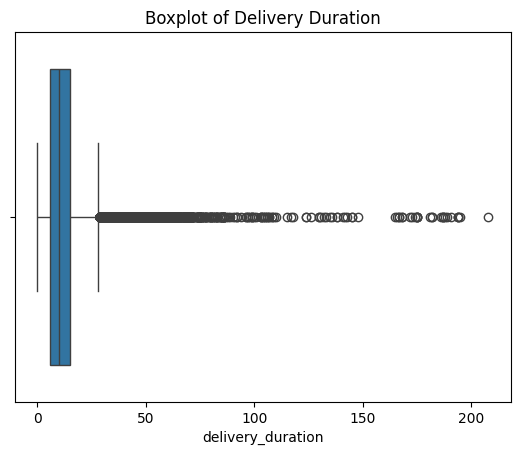

In [13]:
#We will check for the outliers in delivery duration first.
sns.boxplot(x=customers_copy2['delivery_duration'])
plt.title("Boxplot of Delivery Duration")
plt.show()

In [14]:
customers_copy2['delivery_duration'].describe()

count    113194.000000
mean         11.976412
std           9.362060
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         208.000000
Name: delivery_duration, dtype: float64

There are outliers in our distribution but 75% of deliveries happen under 15 days so it is best to cap the outliers. 

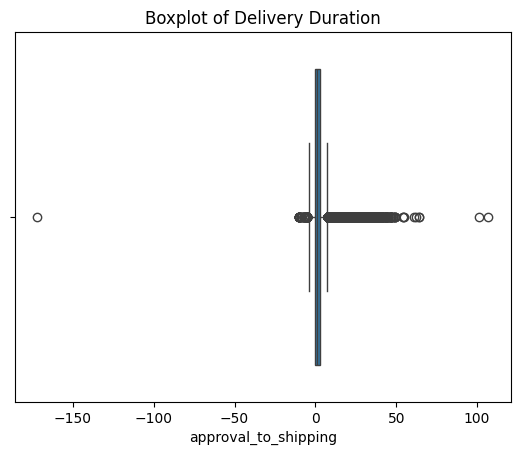

In [15]:
sns.boxplot(x=customers_copy2['approval_to_shipping'])
plt.title("Boxplot of Delivery Duration")
plt.show()

In [16]:
customers_copy2['approval_to_shipping'].describe()

count    113194.00000
mean          2.33530
std           3.54855
min        -172.00000
25%           0.00000
50%           1.00000
75%           3.00000
max         107.00000
Name: approval_to_shipping, dtype: float64

In [17]:
customers_copy2[customers_copy2['approval_to_shipping'] <0]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,category_name,seller_zip_code_prefix,seller_city,seller_state,delivery_duration,delayed_delivery,approval_to_shipping,is_negative_review
143,dc53883e94804c81b4afdf2c23478d97,5ece49e012285b9003d084a4ea8a9c94,9862,sao bernardo do campo,SP,a1f5afc5fe7a4ee4bef93aab1e95772f,delivered,2017-05-06 11:09:15,2017-05-11 23:31:25,2017-05-09 08:48:36,...,14.0,61.0,auto,7112,guarulhos,SP,9,0,-3,0
213,2abea2bf3e5611f7a96f8d24f21a7198,ed62ab8aab76f4d4efc4344ba5ef3a6d,52070,recife,PE,f85a3babb8f57542a4493f9c45523501,delivered,2018-07-04 11:13:48,2018-07-05 16:33:19,2018-07-04 16:10:00,...,13.0,11.0,computers_accessories,30190,belo horizonte,MG,7,0,-2,0
294,09f548315be5f30a9610b83ad933aaf1,c1c2fffe3d49911803df2e157bee7aa0,55700,limoeiro,PE,8283cb8792b84009b158a085333ee8b3,delivered,2018-04-20 08:18:07,2018-04-24 18:14:55,2018-04-23 19:21:04,...,18.0,23.0,health_beauty,14095,ribeirao preto,SP,18,0,-1,0
302,5b7ad66e4a9c19ef5ddceae95d05e46e,b0b18bfffa6a1fb823a25a9167e6877c,72331,brasilia,DF,a4652eb1954cd0c3121a95ba49122673,delivered,2018-08-19 21:37:17,2018-08-20 13:30:48,2018-08-20 12:54:00,...,6.0,40.0,home_construction,88075,florianopolis,SP,10,0,-1,1
309,a56b03f5e6015f1a502b9810309b98b7,b6cbe1a8674ee23e9fb086e3c61677b8,41308,salvador,BA,4b8f5652792df716a6e936ae0c78a935,delivered,2017-06-26 12:05:33,2017-07-01 21:33:24,2017-06-26 13:05:19,...,10.0,35.0,furniture_decor,36502,uba,MG,16,0,-6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112915,e24fceba7ac4b1b1cd1884f05ba68e9d,7410c7ed56c93d4eee17a7b7b3a75b3e,13056,campinas,SP,4f3a6e28d764cf896b1fceb0028422c8,delivered,2018-07-03 09:34:16,2018-07-05 16:21:50,2018-07-03 16:52:00,...,5.0,21.0,books_technical,2274,sao paulo,SP,2,0,-2,0
112992,269241d3dcdfa33840108eff894f180c,6602e7e0fd01e2fe3e09e73782847478,26700,mendes,RJ,f8d0d96aa37dec6d5889d28cf88574b5,delivered,2018-06-30 14:40:41,2018-07-05 16:14:44,2018-07-04 14:19:00,...,23.0,31.0,sports_leisure,22240,rio de janeiro,RJ,10,0,-2,0
113056,17635f40f800086f9e8990bd43d9aee7,311095a4ee35aef6817083718f97e1c4,5001,sao paulo,SP,e3f0b406629d8e6309d61f34a2087d71,delivered,2018-04-22 19:42:32,2018-04-24 18:05:33,2018-04-23 19:04:00,...,58.0,42.0,kitchen_dining_laundry_garden_furniture,13920,pedreira,SP,1,0,-1,1
113057,17635f40f800086f9e8990bd43d9aee7,311095a4ee35aef6817083718f97e1c4,5001,sao paulo,SP,e3f0b406629d8e6309d61f34a2087d71,delivered,2018-04-22 19:42:32,2018-04-24 18:05:33,2018-04-23 19:04:00,...,61.0,31.0,housewares,37443,baependi,MG,1,0,-1,1


Similarly we can see that there are large outliers in approval to shipping column as well, so we will make a IQR function to deal with these.

In [19]:
def cap_iqr(df, columns):
   
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].apply(
            lambda x: upper_bound if x > upper_bound else (0 if x < lower_bound else x) #here I have capped lower limit to 0 for seamless insight.
        )

        print(f"✅ Capped '{col}' between [{0}, {round(upper_bound, 2)}]")

    return df


In [20]:
columns_cap = ['approval_to_shipping', 'delivery_duration']
customers_copy2 = cap_iqr(customers_copy2, columns_cap)

✅ Capped 'approval_to_shipping' between [0, 7.5]
✅ Capped 'delivery_duration' between [0, 28.5]


In [21]:
customers_copy2['approval_to_shipping'].describe()

count    113194.000000
mean          2.034891
std           2.211053
min          -4.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           7.500000
Name: approval_to_shipping, dtype: float64

In [22]:
customers_copy2['delivery_duration'].describe()

count    113194.000000
mean         11.411153
std           7.054217
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max          28.500000
Name: delivery_duration, dtype: float64

In [23]:
customers_copy2.to_csv('customers_final.csv', index=False)